In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [2]:
#Extract Filenames from Folder

In [3]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [4]:
len(filenames)

44441

In [5]:
#Importing ResNet50 Model and Cofiguration

In [6]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
#Extracting Fetaures from Image

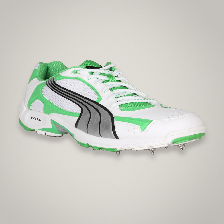

In [8]:
img = image.load_img('Shoes.jpg', target_size=(224,224))
img

In [9]:
 img_array = image.img_to_array(img)
 img_array

array([[[195., 192., 187.],
        [196., 193., 188.],
        [195., 192., 187.],
        ...,
        [196., 193., 186.],
        [196., 193., 186.],
        [196., 193., 188.]],

       [[195., 192., 187.],
        [196., 193., 188.],
        [194., 191., 186.],
        ...,
        [196., 193., 186.],
        [196., 193., 186.],
        [196., 193., 188.]],

       [[196., 193., 188.],
        [197., 194., 189.],
        [196., 193., 188.],
        ...,
        [195., 192., 185.],
        [195., 192., 185.],
        [195., 192., 185.]],

       ...,

       [[195., 192., 187.],
        [195., 192., 185.],
        [195., 192., 187.],
        ...,
        [191., 188., 183.],
        [192., 189., 184.],
        [192., 189., 184.]],

       [[195., 192., 187.],
        [195., 192., 187.],
        [195., 192., 185.],
        ...,
        [192., 189., 184.],
        [191., 188., 183.],
        [192., 189., 184.]],

       [[195., 192., 187.],
        [195., 192., 185.],
        [195., 1

In [10]:
img_array.shape

(224, 224, 3)

In [11]:
 img_expand_dim = np.expand_dims(img_array, axis=0)

In [12]:
 img_expand_dim.shape

(1, 224, 224, 3)

In [13]:
  img_preprocess = preprocess_input(img_expand_dim)

In [14]:
  img_preprocess.shape

(1, 224, 224, 3)

In [15]:
    result = model.predict(img_preprocess).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [16]:
result

array([5.8261423 , 1.2084826 , 9.844448  , ..., 5.7062206 , 2.8655972 ,
       0.96818566], dtype=float32)

In [17]:
result.shape

(2048,)

In [18]:
  norm_result = result/norm(result)

In [19]:
norm_result

array([0.01931139, 0.00400565, 0.03263051, ..., 0.0189139 , 0.00949834,
       0.00320916], dtype=float32)

In [20]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [21]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


array([0.        , 0.01761617, 0.00171608, ..., 0.01247239, 0.02726404,
       0.06899218], dtype=float32)

In [28]:
image_features = []
for file in filenames[0:2500]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.        , 0.01761617, 0.00171608, ..., 0.01247239, 0.02726404,
        0.06899218], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997913, 0.02375535,
        0.04649905], dtype=float32),
 array([0.        , 0.03642146, 0.00710438, ..., 0.00140771, 0.        ,
        0.05435038], dtype=float32),
 array([0.00232165, 0.05030548, 0.00747743, ..., 0.00346684, 0.03391017,
        0.04565745], dtype=float32),
 array([0.00306835, 0.0624045 , 0.        , ..., 0.00170624, 0.02032885,
        0.05833261], dtype=float32),
 array([0.        , 0.1046912 , 0.0019809 , ..., 0.        , 0.03033772,
        0.02712848], dtype=float32),
 array([0.        , 0.1243846 , 0.01465613, ..., 0.00289705, 0.0405516 ,
        0.06534588], dtype=float32),
 array([0.        , 0.09169203, 0.0156991 , ..., 0.        , 0.0050358 ,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545277, 0.01153319, ..., 0.00073008, 0.04513266,
        0.07661069], dtype=float32),
 array([0.

In [30]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [31]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [32]:
#Loading Pickle Files

In [33]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [34]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [35]:
np.array(Image_features).shape

(2500, 2048)

In [36]:
#Finidng Simialar Images

In [52]:
neighbors = NearestNeighbors(n_neighbors=8, algorithm='brute', metric='euclidean')

In [53]:
neighbors.fit(Image_features)

,n_neighbors,8
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [54]:
input_image = extract_features_from_images('Shoes.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


In [55]:
distance,indices = neighbors.kneighbors([input_image])

In [56]:
indices[0]

array([ 105, 1650, 2248, 2264, 1511, 2269, 2253, 2435], dtype=int64)

In [57]:
from IPython.display import Image

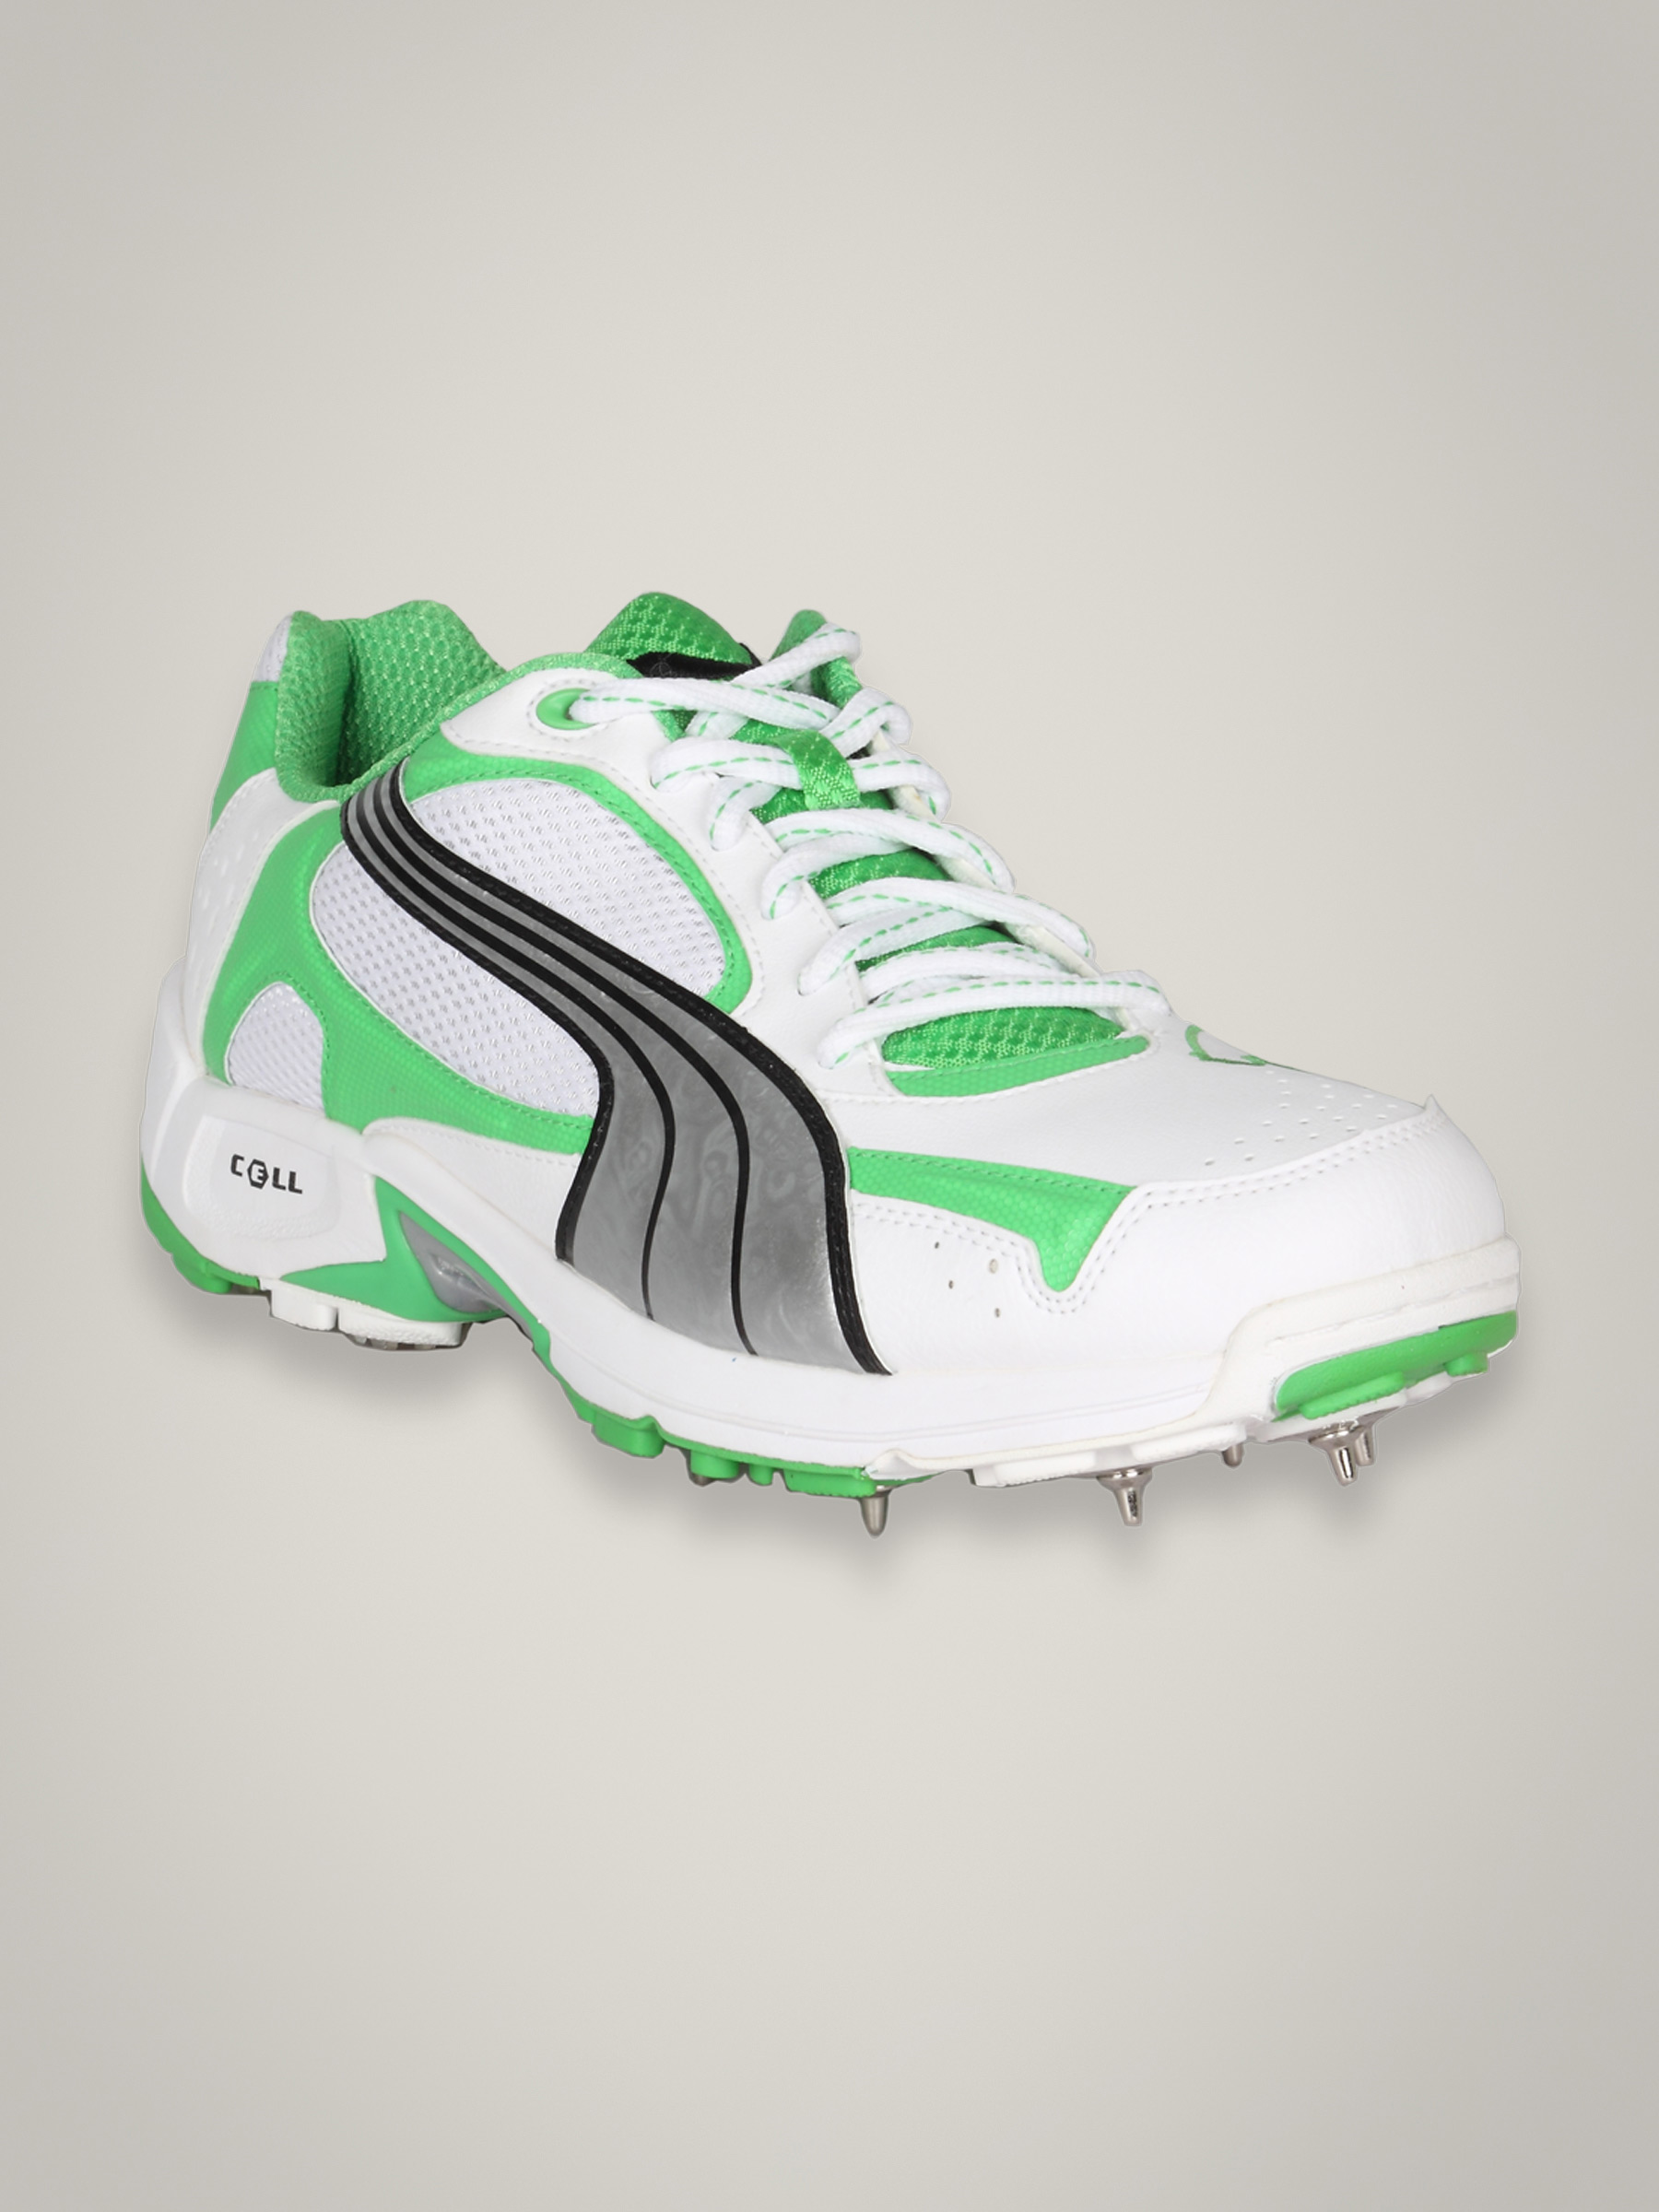

In [58]:
Image('Shoes.jpg')

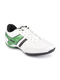

In [59]:
Image(filenames[indices[0][1]])

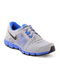

In [60]:
Image(filenames[indices[0][2]])

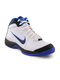

In [61]:
Image(filenames[indices[0][3]])

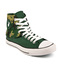

In [62]:
Image(filenames[indices[0][4
    ]])

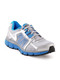

In [63]:
Image(filenames[indices[0][5]])

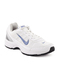

In [64]:
Image(filenames[indices[0][6]])

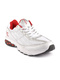

In [65]:
Image(filenames[indices[0][7]])